In [117]:
#################SYNCHRONOUS
import requests

json = {"SEARCH_VALUE":"X","STARTS_WITH_YN":"false","ACTIVE_ONLY_YN":"true"}

resp = requests.post("https://firststop.sos.nd.gov/api/Records/businesssearch", json=json)
a = resp.json()

onlyX = {}
for biz_id in a["rows"]:
    if a["rows"][biz_id]["TITLE"][0][0] in ['x', 'X']:
        onlyX[str(biz_id)] = {'TITLE': a["rows"][biz_id]["TITLE"][0]}
    
for bizID in onlyX.keys():
    resp = requests.get(f"https://firststop.sos.nd.gov/api/FilingDetail/business/{int(bizID)}/false")
    b = resp.json()

    for item in b['DRAWER_DETAIL_LIST']:
        if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent']:
            onlyX[bizID]['AGENT'] = item['LABEL']
            onlyX[bizID]['ID'] = item['VALUE']


In [123]:
onlyX

{'319429': {'TITLE': 'X Diamond Partners, LLP',
  'AGENT': 'Registered Agent',
  'ID': 'KENDALL  VETTER\n2341 BAYVIEW COURT SE\nMANDAN, ND  58554'},
 '244002': {'TITLE': 'X ELECTRIC',
  'AGENT': 'Owner Name',
  'ID': 'XTREME ELECTRICAL SERVICES, INC.'},
 '336584': {'TITLE': 'X Golf Bismarck',
  'AGENT': 'Owner Name',
  'ID': 'Elite Golf 2, LLC'},
 '322123': {'TITLE': 'X Golf Minot',
  'AGENT': 'Owner Name',
  'ID': 'Elite Golf, LLC'},
 '329549': {'TITLE': 'X Realty LLC',
  'AGENT': 'Registered Agent',
  'ID': 'ERIC  CHRISTIANS\n3749 14TH ST W\nWEST FARGO, ND  58078'},
 '304760': {'TITLE': 'X REPUBLIC SALON LLC',
  'AGENT': 'Registered Agent',
  'ID': 'PEDRO  CAVASAS\n2396 125TH AVE NW\nWATFORD CITY, ND  58854'},
 '157286': {'TITLE': 'X S BROKERS INSURANCE AGENCY, INC.',
  'AGENT': 'Commercial Registered Agent',
  'ID': 'REGISTERED AGENT SOLUTIONS, INC.\n1709 N 19TH ST STE 3\nBISMARCK, ND  58501-2121'},
 '68357': {'TITLE': 'X2COMM, INC.',
  'AGENT': 'Commercial Registered Agent',
  'ID'

In [134]:
#################ASYNCHRONOUS
import aiohttp
import asyncio
import requests

json = {"SEARCH_VALUE":"X","STARTS_WITH_YN":"false","ACTIVE_ONLY_YN":"true"}

resp = requests.post("https://firststop.sos.nd.gov/api/Records/businesssearch", json=json)
a = resp.json()

onlyX = {}
for biz_id in a["rows"]:
    if a["rows"][biz_id]["TITLE"][0][0] in ['x', 'X']:
        onlyX[str(biz_id)] = {'TITLE': a["rows"][biz_id]["TITLE"][0]}

async def main():

    async with aiohttp.ClientSession() as session:
        for bizID in onlyX.keys():
            bizURL = f"https://firststop.sos.nd.gov/api/FilingDetail/business/{int(bizID)}/false"
            async with session.get(bizURL) as resp:
                b = await resp.json()
                for item in b['DRAWER_DETAIL_LIST']:
                    if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent']:
                        onlyX[bizID]['AGENT'] = item['LABEL']
                        onlyX[bizID]['ID'] = item['VALUE']

await main()

In [151]:
onlyX

{'319429': {'TITLE': 'X Diamond Partners, LLP',
  'AGENT': 'Registered Agent',
  'ID': 'KENDALL  VETTER\n2341 BAYVIEW COURT SE\nMANDAN, ND  58554'},
 '244002': {'TITLE': 'X ELECTRIC',
  'AGENT': 'Owner Name',
  'ID': 'XTREME ELECTRICAL SERVICES, INC.'},
 '336584': {'TITLE': 'X Golf Bismarck',
  'AGENT': 'Owner Name',
  'ID': 'Elite Golf 2, LLC'},
 '322123': {'TITLE': 'X Golf Minot',
  'AGENT': 'Owner Name',
  'ID': 'Elite Golf, LLC'},
 '329549': {'TITLE': 'X Realty LLC',
  'AGENT': 'Registered Agent',
  'ID': 'ERIC  CHRISTIANS\n3749 14TH ST W\nWEST FARGO, ND  58078'},
 '304760': {'TITLE': 'X REPUBLIC SALON LLC',
  'AGENT': 'Registered Agent',
  'ID': 'PEDRO  CAVASAS\n2396 125TH AVE NW\nWATFORD CITY, ND  58854'},
 '157286': {'TITLE': 'X S BROKERS INSURANCE AGENCY, INC.',
  'AGENT': 'Commercial Registered Agent',
  'ID': 'REGISTERED AGENT SOLUTIONS, INC.\n1709 N 19TH ST STE 3\nBISMARCK, ND  58501-2121'},
 '68357': {'TITLE': 'X2COMM, INC.',
  'AGENT': 'Commercial Registered Agent',
  'ID'

In [138]:
import aiohttp
import asyncio
import time
import requests

json = {"SEARCH_VALUE":"X","STARTS_WITH_YN":"false","ACTIVE_ONLY_YN":"true"}

resp = requests.post("https://firststop.sos.nd.gov/api/Records/businesssearch", json=json)
a = resp.json()

onlyX = {}
IDs = []

for biz_id in a["rows"]:
    if a["rows"][biz_id]["TITLE"][0][0] in ['x', 'X']:
        onlyX[str(biz_id)] = {'TITLE': a["rows"][biz_id]["TITLE"][0]}

async def getBizAgent(session, url):
    async with session.get(url) as resp:
        b = await resp.json()
        return b

async def main():

    async with aiohttp.ClientSession() as session:

        tasks = []
        for bizID in onlyX.keys():
            bizURL = f"https://firststop.sos.nd.gov/api/FilingDetail/business/{int(bizID)}/false"
            tasks.append(asyncio.ensure_future(getBizAgent(session, bizURL)))

        BizAgents = await asyncio.gather(*tasks)
        for agent in BizAgents:
            IDs.append(agent)

await main()

for agentID, bizID in zip(IDs, onlyX.keys()):
    for item in agentID['DRAWER_DETAIL_LIST']:
        if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent', 'Owners']:
            onlyX[bizID]['AGENT'] = item['LABEL']
            onlyX[bizID]['ID'] = item['VALUE']


In [143]:
for agentID, bizID in zip(IDs, onlyX.keys()):
    for item in agentID['DRAWER_DETAIL_LIST']:
        if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent']:
            onlyX[bizID]['AGENT'] = item['LABEL']
            onlyX[bizID]['ID'] = item['VALUE']

In [149]:
import pandas as pd
onlyXList = list(onlyX.values())
df = pd.DataFrame(onlyXList)

In [150]:
df

,TITLE,AGENT,ID
0,"X Diamond Partners, LLP",Registered Agent,KENDALL VETTER\n2341 BAYVIEW COURT SE\nMANDAN...
1,X ELECTRIC,Owner Name,"XTREME ELECTRICAL SERVICES, INC."
2,X Golf Bismarck,Owner Name,"Elite Golf 2, LLC"
3,X Golf Minot,Owner Name,"Elite Golf, LLC"
4,X Realty LLC,Registered Agent,"ERIC CHRISTIANS\n3749 14TH ST W\nWEST FARGO, ..."
...,...,...,...
160,"XYLEM DEWATERING SOLUTIONS, INC.",Commercial Registered Agent,C T CORPORATION SYSTEM\n120 W SWEET AVE\nBISMA...
161,"XYLEM WATER SOLUTIONS U.S.A., INC.",Commercial Registered Agent,C T CORPORATION SYSTEM\n120 W SWEET AVE\nBISMA...
162,XYMTEC Industries LLC,Registered Agent,"ANDREW SANDVIK\n409 FOXTAIL DR\nWEST FARGO, N..."
163,XYZ LLC,Registered Agent,"DAVID SATROM\n711 1ST AVE N # 4\nJAMESTOWN, N..."


In [152]:

resp = requests.get("https://firststop.sos.nd.gov/api/FilingDetail/business/259434/false")
b = resp.json()

# for item in b['DRAWER_DETAIL_LIST']:
#     if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent']:
#         onlyX[bizID]['AGENT'] = item['LABEL']
#         onlyX[bizID]['ID'] = item['VALUE']

In [153]:
b

{'DRAWER_DETAIL_LIST': [{'LABEL': 'Filing Type',
   'VALUE': 'Trade Name',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Status',
   'VALUE': 'Active',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Owners',
   'VALUE': 'CHARLES DOSH\n121 3RD AVE E\nWEST FARGO, ND 58078-1820',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': '',
   'VALUE': 'SHAWNA DOSH\n121 3RD AVE E\nWEST FARGO, ND 58078-1820',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Nature of Business',
   'VALUE': 'SALES OF EMERGENCY VEHICLE LIGHTS AND AUXILLARY LIGHTS',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Term of Duration',
   'VALUE': 'Expires - 5 years',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Initial Filing Date',
   'VALUE': '03/02/2015',
   'TYPE': None,
   'LINKLABEL': None,
   'ALERT_YN': False},
  {'LABEL': 'Expiration Date',
   'VALUE

In [116]:
import aiohttp
import asyncio
import requests

BUSINESS_SEARCH_URL = "https://firststop.sos.nd.gov/api/Records/businesssearch"
BUSINESS_SEARCH_JSON = {"SEARCH_VALUE":"X","STARTS_WITH_YN":"false","ACTIVE_ONLY_YN":"true"}

def getXbiz():
    resp = requests.post(BUSINESS_SEARCH_URL, json=BUSINESS_SEARCH_JSON)
    a = resp.json()

    for biz_id in a["rows"]:
        if a["rows"][biz_id]["TITLE"][0][0] in ['x', 'X']:
            onlyX[str(biz_id)] = {'TITLE': a["rows"][biz_id]["TITLE"][0]}
    return onlyX

async def getBizAgent(session, url):
    async with session.get(url) as resp:
        b = await resp.json()
        return b

async def main():

    onlyX = getXbiz()

    async with aiohttp.ClientSession() as session:

        tasks = []
        for bizID in onlyX.keys():
            url = f'https://firststop.sos.nd.gov/api/FilingDetail/business/{bizID}/false'
            tasks.append(asyncio.ensure_future(getBizAgent(session, url)))

        bizAgents = await asyncio.gather(*tasks)
        for item in bizAgents['DRAWER_DETAIL_LIST']:
            if item['LABEL'] in  ['Registered Agent', 'Owner Name', 'Commercial Registered Agent']:
                onlyX[bizID]['AGENT'] = item['LABEL']
                onlyX[bizID]['ID'] = item['VALUE']

# asyncio.run(main())
await main()
    

# if __name__ == '__main__':
#     xBusiness.main()

ServerDisconnectedError: Server disconnected

In [113]:
xBusiness.main()


{'TITLE': 'XLT TAXI'}


In [ ]:

async def get_pokemon(session, url):
    async with session.get(url) as resp:
        pokemon = await resp.json()
        return pokemon['name']


async def main():

    async with aiohttp.ClientSession() as session:

        tasks = []
        for bizID in onlyX.keys():
            url = f'https://firststop.sos.nd.gov/api/FilingDetail/business/{bizID}/false'
            tasks.append(asyncio.ensure_future(get_pokemon(session, url)))

        original_pokemon = await asyncio.gather(*tasks)
        for pokemon in original_pokemon:
            print(pokemon)

asyncio.run(main())

In [47]:
onlyX = {}
for biz_id in a["rows"]:
    if a["rows"][biz_id]["TITLE"][0][0] in ['x', 'X']:
        onlyX[str(biz_id)] = a["rows"][biz_id]["TITLE"]

In [44]:
a["rows"]['143816']["TITLE"][1]

'Limited Liability Company - Business - Domestic'

True

In [48]:
onlyX

{'319429': ['X Diamond Partners, LLP',
  'Limited Liability Partnership - Domestic'],
 '244002': ['X ELECTRIC', 'Trade Name'],
 '336584': ['X Golf Bismarck', 'Trade Name'],
 '322123': ['X Golf Minot', 'Trade Name'],
 '329549': ['X Realty LLC', 'Limited Liability Company - Business - Domestic'],
 '304760': ['X REPUBLIC SALON LLC',
  'Limited Liability Company - Business - Domestic'],
 '157286': ['X S BROKERS INSURANCE AGENCY, INC.',
  'Corporation - Business - Foreign'],
 '68357': ['X2COMM, INC.', 'Corporation - Business - Foreign'],
 '343679': ['x2VA LLC', 'Limited Liability Company - Business - Domestic'],
 '315018': ['XactlyOne Foundation', 'Corporation - Nonprofit - Foreign'],
 '330579': ['Xactus, LLC', 'Limited Liability Company - Business - Foreign'],
 '41359': ['XANADU PRODUCTS, L.L.C.',
  'Limited Liability Company - Business - Domestic'],
 '84218': ['XANADU, LLC', 'Limited Liability Company - Business - Domestic'],
 '310991': ['Xander Products & Service LLC',
  'Limited Liabili

In [163]:
import networkx as nx
df = pd.read_csv("businesses.csv", index_col=0)

In [165]:
df

,TITLE,AGENT,ID
0,"X DIAMOND PARTNERS, LLP",REGISTERED AGENT,KENDALL VETTER\n2341 BAYVIEW COURT SE\nMANDAN...
1,X ELECTRIC,OWNER NAME,"XTREME ELECTRICAL SERVICES, INC."
2,X GOLF BISMARCK,OWNER NAME,"ELITE GOLF 2, LLC"
3,X GOLF MINOT,OWNER NAME,"ELITE GOLF, LLC"
4,X REALTY LLC,REGISTERED AGENT,"ERIC CHRISTIANS\n3749 14TH ST W\nWEST FARGO, ..."
...,...,...,...
160,"XYLEM DEWATERING SOLUTIONS, INC.",COMMERCIAL REGISTERED AGENT,C T CORPORATION SYSTEM\n120 W SWEET AVE\nBISMA...
161,"XYLEM WATER SOLUTIONS U.S.A., INC.",COMMERCIAL REGISTERED AGENT,C T CORPORATION SYSTEM\n120 W SWEET AVE\nBISMA...
162,XYMTEC INDUSTRIES LLC,REGISTERED AGENT,"ANDREW SANDVIK\n409 FOXTAIL DR\nWEST FARGO, N..."
163,XYZ LLC,REGISTERED AGENT,"DAVID SATROM\n711 1ST AVE N # 4\nJAMESTOWN, N..."


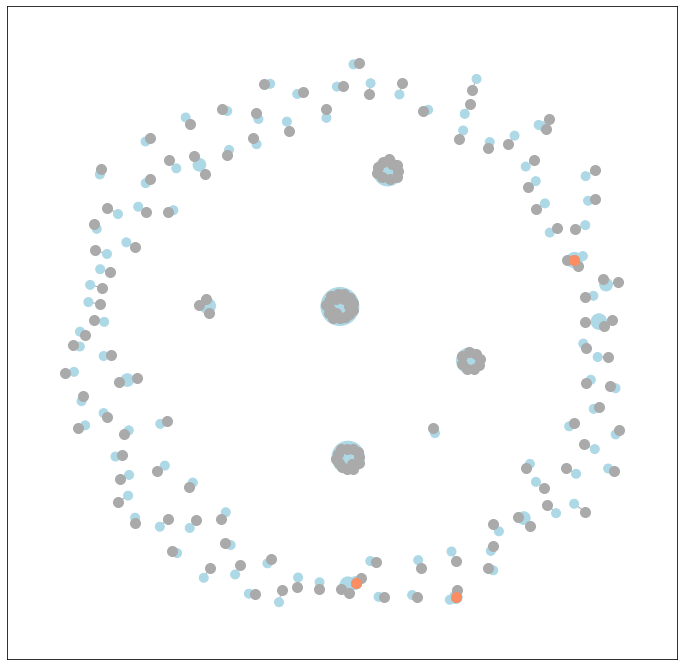

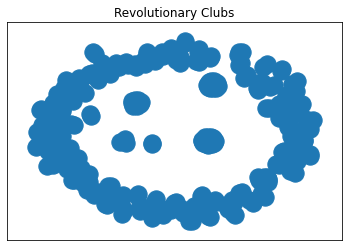

In [176]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='TITLE', target='ID')

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

IDs = [node for node in g.nodes() if node in df.ID.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df.ID.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=IDs, node_size=size, node_color='lightblue')

title = [node for node in g.nodes() if node in df.TITLE.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=title, node_size=100, node_color='#AAAAAA')

high_degree_title = [node for node in g.nodes() if node in df.TITLE.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_title, node_size=100, node_color='#fc8d62')

ID_dict = dict(zip(IDs, IDs))
# nx.draw_networkx_labels(g, layout, labels=ID_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [162]:
agents

['X DIAMOND PARTNERS, LLP',
 'X ELECTRIC',
 'X GOLF BISMARCK',
 'X GOLF MINOT',
 'X REALTY LLC',
 'X REPUBLIC SALON LLC',
 'X S BROKERS INSURANCE AGENCY, INC.',
 'X2COMM, INC.',
 'X2VA LLC',
 'XACTLYONE FOUNDATION',
 'XACTUS, LLC',
 'XANADU PRODUCTS, L.L.C.',
 'XANADU, LLC',
 'XANDER PRODUCTS & SERVICE LLC',
 'XAP CORPORATION',
 'XAPIC STUDIOS',
 'XB INVESTMENTS, LLC',
 'XCALIBER INTERNATIONAL LTD., L.L.C.',
 'XCAST LABS, INC.',
 'XCED AVIATION SERVICES, LLC',
 'XCEL AG SOLUTIONS LLC',
 'XCEL AGRONOMY LLC',
 'XCEL AUTOMATION',
 'XCEL AUTOMATION & ELECTRIC LLC',
 'XCEL AVIATION',
 'XCEL AVIATION LLC',
 'XCEL ENERGY',
 'XCEL ENERGY INC.',
 'XCEL ENERGY SERVICES INC.',
 'XCEL ERECTORS, INC.',
 'XCEL HOLDINGS',
 'XCEL HOLDINGS LLC',
 'XCEL NDT LLC',
 'XCEL PROTECTIVE SERVICES, INC.',
 'XCEL TRUCKING LLC',
 'XCELL DRIVING SCHOOL LLP',
 'XCHANGE BENEFITS, LLC',
 'XCHANGE TELECOM LLC',
 'XCL ASSETCO, LLC',
 'XCL MARKETING, LLC',
 'XCL RESOURCES, LLC',
 'XCL ROYALTYCO, LLC',
 'XCLOUD, LLC',
 '